### simulate time series given parameters

In [42]:
import statsmodels.tsa.arima_process as ap
import numpy as np
ar_coef = [1,.75, -.25]
ma_coef =[1, -.5]
# ma_coef = [1, -.5]
nobs = int(1e3)
# ar = np.r_[1, -ar] # add zero-lag and negate
# ma = np.r_[1, ma] # add zero-lag
# add the seaonal component
se_coef = [0.2, 0.3, -0.5 ]
y = ap.arma_generate_sample(ar_coef, ma_coef, nobs)
for i in range(nobs):
    y[i] = y[i]+ se_coef[i%3]
print(y.shape)

(1000,)


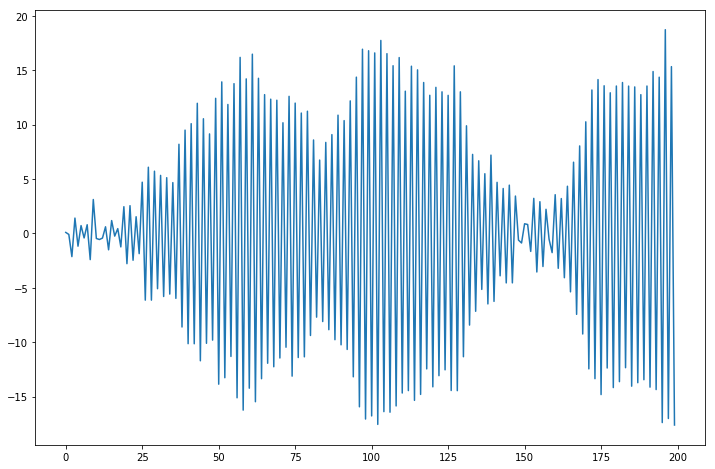

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
timeseries =y
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(timeseries[:200],label='Original')

In [ ]:
import numpy as np 
def f1(x, w, c):
    y=np.cos(2*np.pi*w +  c*x)
    return y

def f2(x, w, c):
    y=(c**(-2) + (x+w)**2)**(-1)
    return y

def f3(x, w, c):
    y = 1 + c*x
    return y


In [25]:
# Generate the function
N = 1000
xs =[]
Genz = f1
for i in range(N):
    xs.append(Genz(i, w, c))

In [24]:
# Generate the dynamics
h1 = 0.0
print('start:', h1)
w = 0.5
c = 1
T = int(1e4)
ts = []
ts.append(h1)
for i in range(T-1):
    h2 = Genz(h1, w, c)
    h1 = np.copy(h2)
    ts.append(h1)
print(len(ts))

start: 0.0
10000


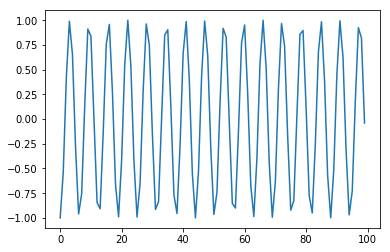

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xs[:100])
# plt.plot(ts[:100])
# np.save('../data.npy', ts)
# print('data saved')